In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import pyarrow as pa

import pandas as pd
import seaborn as sns

In [2]:
DATA_DIR = Path.cwd().resolve().parent / "datos"

DATA_DIR

PosixPath('/Users/david.palacio/Documents/academia/titanic-prediccion/datos')

In [3]:
datos_titanic = pd.read_parquet(DATA_DIR / "01_datos_crudos_titanic.parquet")

In [4]:
datos_titanic.sample(10, random_state=100)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,home.dest
173,1,0,male,32.5,0,0,211.5,C132,C,?
843,3,0,male,?,1,0,19.9667,?,S,?
996,3,0,male,33,0,0,7.8958,?,S,?
992,3,0,female,30.5,0,0,7.75,?,Q,?
12,1,1,female,24,0,0,69.3,B35,C,"Paris, France"
474,2,0,male,31,0,0,10.5,?,S,"Sweden / Arlington, NJ"
1093,3,0,male,16,0,0,9.2167,?,S,?
225,1,0,male,23,0,0,93.5,B24,S,"Montreal, PQ"
985,3,1,male,24,0,0,7.1417,?,S,?
299,1,0,male,40,0,0,27.7208,?,C,"Mexico City, Mexico"


In [5]:
datos_titanic = datos_titanic.replace("?", np.nan)

In [6]:
datos_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   sex        1309 non-null   object
 3   age        1046 non-null   object
 4   sibsp      1309 non-null   int64 
 5   parch      1309 non-null   int64 
 6   fare       1308 non-null   object
 7   cabin      295 non-null    object
 8   embarked   1307 non-null   object
 9   home.dest  745 non-null    object
dtypes: int64(4), object(6)
memory usage: 102.4+ KB


In [7]:
datos_titanic = datos_titanic.drop(columns=['cabin', 'home.dest'])

* pclass --> 1: alto, 2: medio, 3: bajo. VARIABLE CATEGÓRICA ORDINAL

* sex --> female, male. VARIBALE CATEGÓRICA NOMINAL

* embarked --> C (Cherbourg), Q (Queenstown), S (...). VARIABLE CATEGÓRICA NOMINAL

* sibsp --> si en el cruceo había hermanos, esposa. 0,1,2,3,4... VARIABLE NUMÉRICA DISCRETA

* parch --> si viajaba mamá, papá, hijos... VARIABLE NUMÉRICA DISCRETA

* fare --> tarifa del pasajer@... VARIABLE NUMÉRICA CONTINUA

* age --> edad... VARIABLE NUMÉRICA CONTINUA

* **survived** --> 0 (muerto), 1 (vivo)

# Conversión de datos - Parseo

In [8]:
cols_categoricas = ['sex', 'embarked']

datos_titanic[cols_categoricas] = datos_titanic[cols_categoricas].astype('category')


datos_titanic['pclass'] = pd.Categorical(
    datos_titanic['pclass'], 
    categories=[1, 2, 3], 
    ordered=True)

cols_categoricas_ordinales = ['pclass']

In [9]:
cols_numericas_decimales = ['age', 'fare']

datos_titanic[cols_numericas_decimales] = datos_titanic[cols_numericas_decimales].astype('float64')

In [10]:
cols_numericas_enteros = ['sibsp', 'parch']

datos_titanic[cols_numericas_enteros] = datos_titanic[cols_numericas_enteros].astype('int64')

In [11]:
cols_booleanas = ['survived']

datos_titanic[cols_booleanas] = datos_titanic[cols_booleanas].astype('bool')

In [12]:
datos_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   bool    
 2   sex       1309 non-null   category
 3   age       1046 non-null   float64 
 4   sibsp     1309 non-null   int64   
 5   parch     1309 non-null   int64   
 6   fare      1308 non-null   float64 
 7   embarked  1307 non-null   category
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 46.5 KB


In [13]:
datos_titanic.describe()

,age,sibsp,parch,fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [14]:
datos_titanic.describe(include='category')

,pclass,sex,embarked
count,1309,1309,1307
unique,3,2,3
top,3,male,S
freq,709,843,914


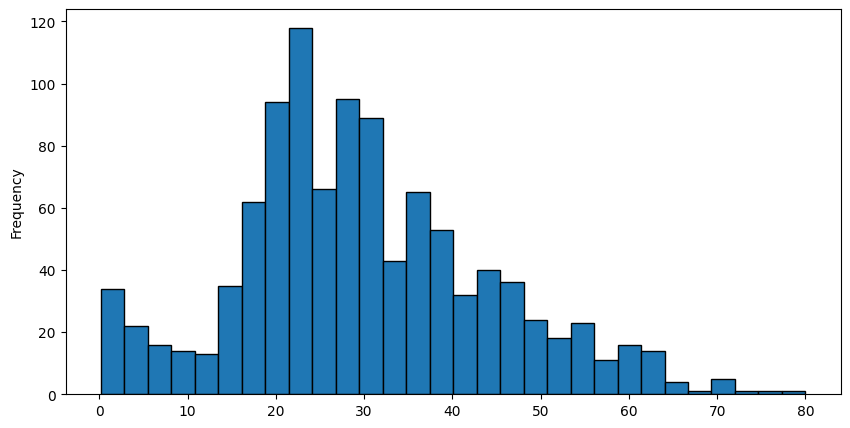

In [15]:
column = 'age'

datos_titanic[column].plot(
    kind="hist", bins=30, edgecolor='black', figsize=(10, 5)
);

<Axes: xlabel='pclass'>

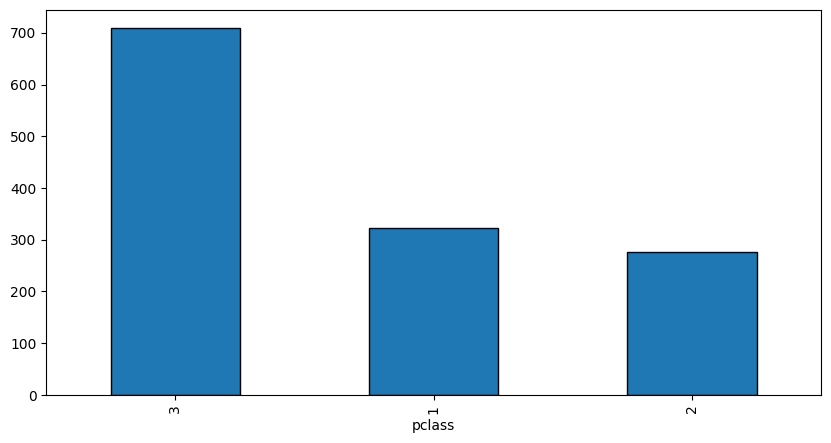

In [16]:
column = 'pclass'

datos_titanic[column].value_counts().plot(
    kind="bar", edgecolor='black', figsize=(10, 5))

# Feature Engineering

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Creación de pipelines

In [18]:
pipe_numerico = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ]
)

In [19]:
pipe_categorico = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [20]:
pipe_categoric_ord = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder())
    ]
)

## Creación de ColumnTransformer

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numericas', pipe_numerico, cols_numericas_decimales + cols_numericas_enteros),
        ('catergoricas_nominales', pipe_categorico, cols_categoricas),
        ('categoricas_ordinales', pipe_categoric_ord, cols_categoricas_ordinales)
    ]
)

preprocessor

,transformers,"[('numericas', ...), ('catergoricas_nominales', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


# Dividir en train y test

In [22]:
X_features = datos_titanic.drop("survived", axis="columns")
Y_target = datos_titanic['survived']

In [23]:
# 80% para train y 20% para test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_features, Y_target, test_size=0.2, random_state=100
)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1047, 7), (262, 7), (1047,), (262,))

# Aplicar transformaciones

In [25]:
datos_transformados = preprocessor.fit(X_train)

datos_transformados

,transformers,"[('numericas', ...), ('catergoricas_nominales', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [26]:
feature_names = preprocessor.get_feature_names_out()

feature_names

array(['numericas__age', 'numericas__fare', 'numericas__sibsp',
       'numericas__parch', 'catergoricas_nominales__sex_female',
       'catergoricas_nominales__sex_male',
       'catergoricas_nominales__embarked_C',
       'catergoricas_nominales__embarked_Q',
       'catergoricas_nominales__embarked_S',
       'categoricas_ordinales__pclass'], dtype=object)

In [27]:
X_train_transformed = preprocessor.transform(X_train) # Lo aplico en todas las columnas predictoras

X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)

X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   numericas__age                      1047 non-null   float64
 1   numericas__fare                     1047 non-null   float64
 2   numericas__sibsp                    1047 non-null   float64
 3   numericas__parch                    1047 non-null   float64
 4   catergoricas_nominales__sex_female  1047 non-null   float64
 5   catergoricas_nominales__sex_male    1047 non-null   float64
 6   catergoricas_nominales__embarked_C  1047 non-null   float64
 7   catergoricas_nominales__embarked_Q  1047 non-null   float64
 8   catergoricas_nominales__embarked_S  1047 non-null   float64
 9   categoricas_ordinales__pclass       1047 non-null   float64
dtypes: float64(10)
memory usage: 81.9 KB


In [28]:
X_train_transformed.head(5)

,numericas__age,numericas__fare,numericas__sibsp,numericas__parch,catergoricas_nominales__sex_female,catergoricas_nominales__sex_male,catergoricas_nominales__embarked_C,catergoricas_nominales__embarked_Q,catergoricas_nominales__embarked_S,categoricas_ordinales__pclass
0,24.0,247.5208,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,30.0,12.7375,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,41.0,13.0000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,67.0,221.7792,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,44.0,26.0000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [32]:
datos_titanic.to_parquet(DATA_DIR / "02_datos_con_tipo_de_dato_ajustado_titanic.parquet")